In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('data/mendota_secchi_depth.txt', delimiter='\t')
df.sort_values(by=['day_of_year'])
x = df['day_of_year']
y = df['secchi_depth']
n = x.shape[0]

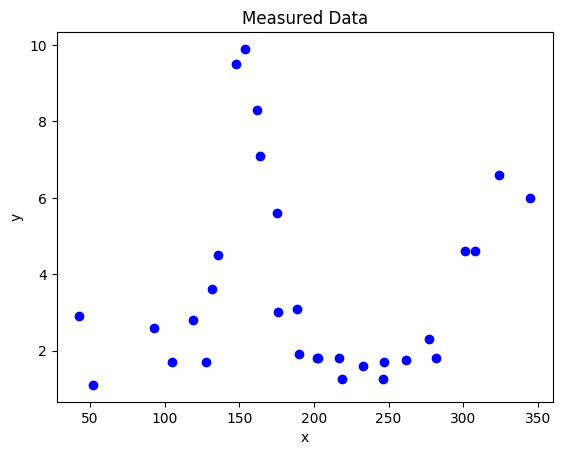

In [17]:
plt.plot(x,y,'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Measured Data')
plt.show()

In [18]:
# Kernel fitting to data

lam = 0.01 #ridge regression parameter
sigma = 10

distsq=np.zeros((n,n),dtype=float)

for i in range(0,n):
    for j in range(0,n):
        distsq[i,j]=(x[i]-x[j])**2

K = np.exp(-distsq/(2*sigma**2))

alpha = np.linalg.inv(K+lam*np.identity(n))@y

Sigma =  10
Lambda =  0.01


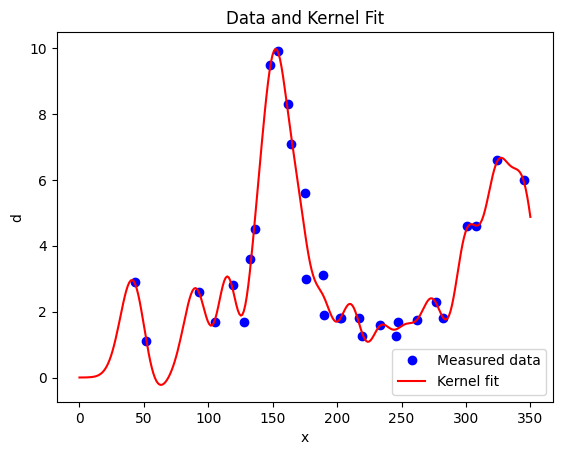

In [19]:
# Generate smooth curve corresponding to data fit
p=300
x_test = np.linspace(0,350.00,p)

distsq_xtest = np.zeros((p,n),dtype=float)
for i in range(0,p):
    for j in range(0,n):
        distsq_xtest[i,j] = (x_test[i]-x[j])**2

dtest = np.exp(-distsq_xtest/(2*sigma**2))@alpha

#dtest = dtest[:, []]

print('Sigma = ',sigma)
print('Lambda = ',lam)
plt.plot(x,y,'bo',label='Measured data')
plt.plot(x_test,dtest,'r',label='Kernel fit')
plt.title('Data and Kernel Fit')
plt.legend(loc='lower right')
plt.xlabel('x')
plt.ylabel('d')
plt.show()

Do these parameters overfit or underfit the data? (overfit)

Sigma =  20
Lambda =  0.2


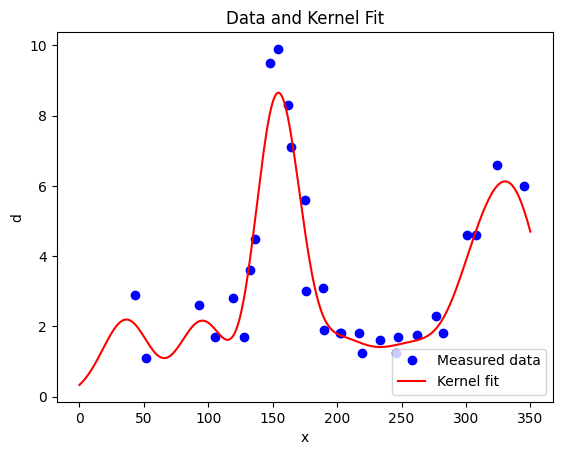

In [20]:
#Adjust the regularization parameter to find a visually better fit

lam = 0.2 #ridge regression parameter
sigma = 20

distsq=np.zeros((n,n),dtype=float)

for i in range(0,n):
    for j in range(0,n):
        distsq[i,j]=(x[i]-x[j])**2

K = np.exp(-distsq/(2*sigma**2))

alpha = np.linalg.inv(K+lam*np.identity(n))@y
# Generate smooth curve corresponding to data fit
p=300
x_test = np.linspace(0,350.00,p)

distsq_xtest = np.zeros((p,n),dtype=float)
for i in range(0,p):
    for j in range(0,n):
        distsq_xtest[i,j] = (x_test[i]-x[j])**2

dtest = np.exp(-distsq_xtest/(2*sigma**2))@alpha

#dtest = dtest[:, []]

print('Sigma = ',sigma)
print('Lambda = ',lam)
plt.plot(x,y,'bo',label='Measured data')
plt.plot(x_test,dtest,'r',label='Kernel fit')
plt.title('Data and Kernel Fit')
plt.legend(loc='lower right')
plt.xlabel('x')
plt.ylabel('d')
plt.show()

Describe how you could use k-fold cross validation to systematically find a good value of σ and λ.

Hide a random non-overlapping subset of data for each combination of sigma and lambda

Measure squared error for each, using holdout data

Find lambda and sigma pair with lowest error